**Import Necessary libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt



In [2]:
df = pd.read_csv('cleaned_data_videoGames.csv')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_ Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,8.0,E,82.74
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,8.3,E,35.83
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,8.0,E,33.00
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,8.5,E,30.01
4,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,6.6,E,29.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1351 non-null   object 
 1   Platform      1351 non-null   object 
 2   Year          1351 non-null   int64  
 3   Genre         1351 non-null   object 
 4   Publisher     1351 non-null   object 
 5   NA_ Sales     1351 non-null   float64
 6   EU_Sales      1351 non-null   float64
 7   JP_Sales      1351 non-null   float64
 8   Other_Sales   1351 non-null   float64
 9   Global_Sales  1351 non-null   float64
 10  Critic_Score  1351 non-null   float64
 11  User_Score    1351 non-null   float64
 12  Rating        1350 non-null   object 
 13  Total_Sales   1351 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 147.9+ KB


In [4]:
print(df.isnull().sum())


Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_ Sales       0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Critic_Score    0
User_Score      0
Rating          1
Total_Sales     0
dtype: int64


**Feature Engineering**

In [5]:
threshold = df['Global_Sales'].quantile(0.75)
df['Success'] = df['Global_Sales'] > threshold

In [6]:
features = ['Publisher', 'Platform', 'Genre', 'Critic_Score', 'User_Score']

In [7]:
df_dummies = pd.get_dummies(df, columns=['Publisher', 'Platform', 'Genre', 'Name'])

In [8]:
X = df[features]
y = df['Success']

In [9]:
df_dummies.columns

Index(['Year', 'NA_ Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'User_Score', 'Rating', 'Total_Sales',
       ...
       'Name_Your Shape: Fitness Evolved',
       'Name_Your Shape: Fitness Evolved 2012', 'Name_ZombiU',
       'Name_Zoo Tycoon DS', 'Name_Zumba Fitness', 'Name_[Prototype]',
       'Name_inFAMOUS', 'Name_inFAMOUS 2', 'Name_inFAMOUS: Second Son',
       'Name_pro evolution soccer 2011'],
      dtype='object', length=1080)

As you can see, the columns get split out into too many new columns due to many unique columns, so I will have to do some feature selection to choose which columns per feature. I will be doing the permutation feature importance to help me choose which features are most important. First I will train the model, then do the feature selection.

In [10]:
X = pd.get_dummies(X)

In [11]:
X.columns

Index(['Critic_Score', 'User_Score', 'Publisher_505 Games',
       'Publisher_Acclaim Entertainment', 'Publisher_Activision',
       'Publisher_Atari', 'Publisher_Atlus', 'Publisher_Bethesda Softworks',
       'Publisher_Black Label Games', 'Publisher_Capcom',
       'Publisher_City Interactive', 'Publisher_Codemasters',
       'Publisher_Crave Entertainment', 'Publisher_D3Publisher',
       'Publisher_Deep Silver', 'Publisher_Disney Interactive Studios',
       'Publisher_Eidos Interactive', 'Publisher_Electronic Arts',
       'Publisher_Empire Interactive', 'Publisher_Global Star',
       'Publisher_Gotham Games', 'Publisher_Hello Games',
       'Publisher_Infogrames', 'Publisher_Konami Digital Entertainment',
       'Publisher_LucasArts', 'Publisher_MTV Games', 'Publisher_Mastertronic',
       'Publisher_Microsoft Game Studios', 'Publisher_Midway Games',
       'Publisher_Mindscape', 'Publisher_NCSoft',
       'Publisher_Namco Bandai Games', 'Publisher_Nintendo',
       'Publisher_P

When I do the code above, it has way too many columns to do any type of analysis.

In [12]:
print(df.head())
print(df.describe())
print(df.info())


                    Name Platform  Year     Genre Publisher  NA_ Sales  \
0             Wii Sports      Wii  2006    Sports  Nintendo      41.49   
1         Mario Kart Wii      Wii  2008    Racing  Nintendo      15.85   
2      Wii Sports Resort      Wii  2009    Sports  Nintendo      15.75   
3  New Super Mario Bros.       DS  2006  Platform  Nintendo      11.38   
4               Wii Play      Wii  2006      Misc  Nintendo      14.03   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  User_Score  \
0     29.02      3.77         8.46         82.74          76.0         8.0   
1     12.88      3.79         3.31         35.82          82.0         8.3   
2     11.01      3.28         2.96         33.00          80.0         8.0   
3      9.23      6.50         2.90         30.01          89.0         8.5   
4      9.20      2.93         2.85         29.02          58.0         6.6   

  Rating  Total_Sales  Success  
0      E        82.74     True  
1      E        35.8

I would like to check how many unique values each of my features have

In [13]:
for column in df.columns:
    print(f"{column}: \n{df[column].nunique()} unique values")

Name: 
981 unique values
Platform: 
19 unique values
Year: 
17 unique values
Genre: 
12 unique values
Publisher: 
57 unique values
NA_ Sales: 
343 unique values
EU_Sales: 
272 unique values
JP_Sales: 
143 unique values
Other_Sales: 
149 unique values
Global_Sales: 
425 unique values
Critic_Score: 
64 unique values
User_Score: 
65 unique values
Rating: 
4 unique values
Total_Sales: 
530 unique values
Success: 
2 unique values


In [14]:
print(df['Publisher'].value_counts())
print(df['Genre'].value_counts())
print(df['Platform'].value_counts())

Electronic Arts                           284
Nintendo                                  155
Activision                                133
Ubisoft                                    97
Sony Computer Entertainment                81
Take-Two Interactive                       76
THQ                                        57
Sega                                       50
Microsoft Game Studios                     48
Warner Bros. Interactive Entertainment     39
Square Enix                                38
Konami Digital Entertainment               34
Capcom                                     33
Namco Bandai Games                         32
LucasArts                                  29
Atari                                      26
Bethesda Softworks                         20
Disney Interactive Studios                 12
Midway Games                               11
Codemasters                                 8
Vivendi Games                               8
Eidos Interactive                 

From here, I would like to figure out which feature to choose? The best way to do this, I would need to do some more 
EDA and choose the top 5 unique value per feature.

**Exploratory Data Analysis**

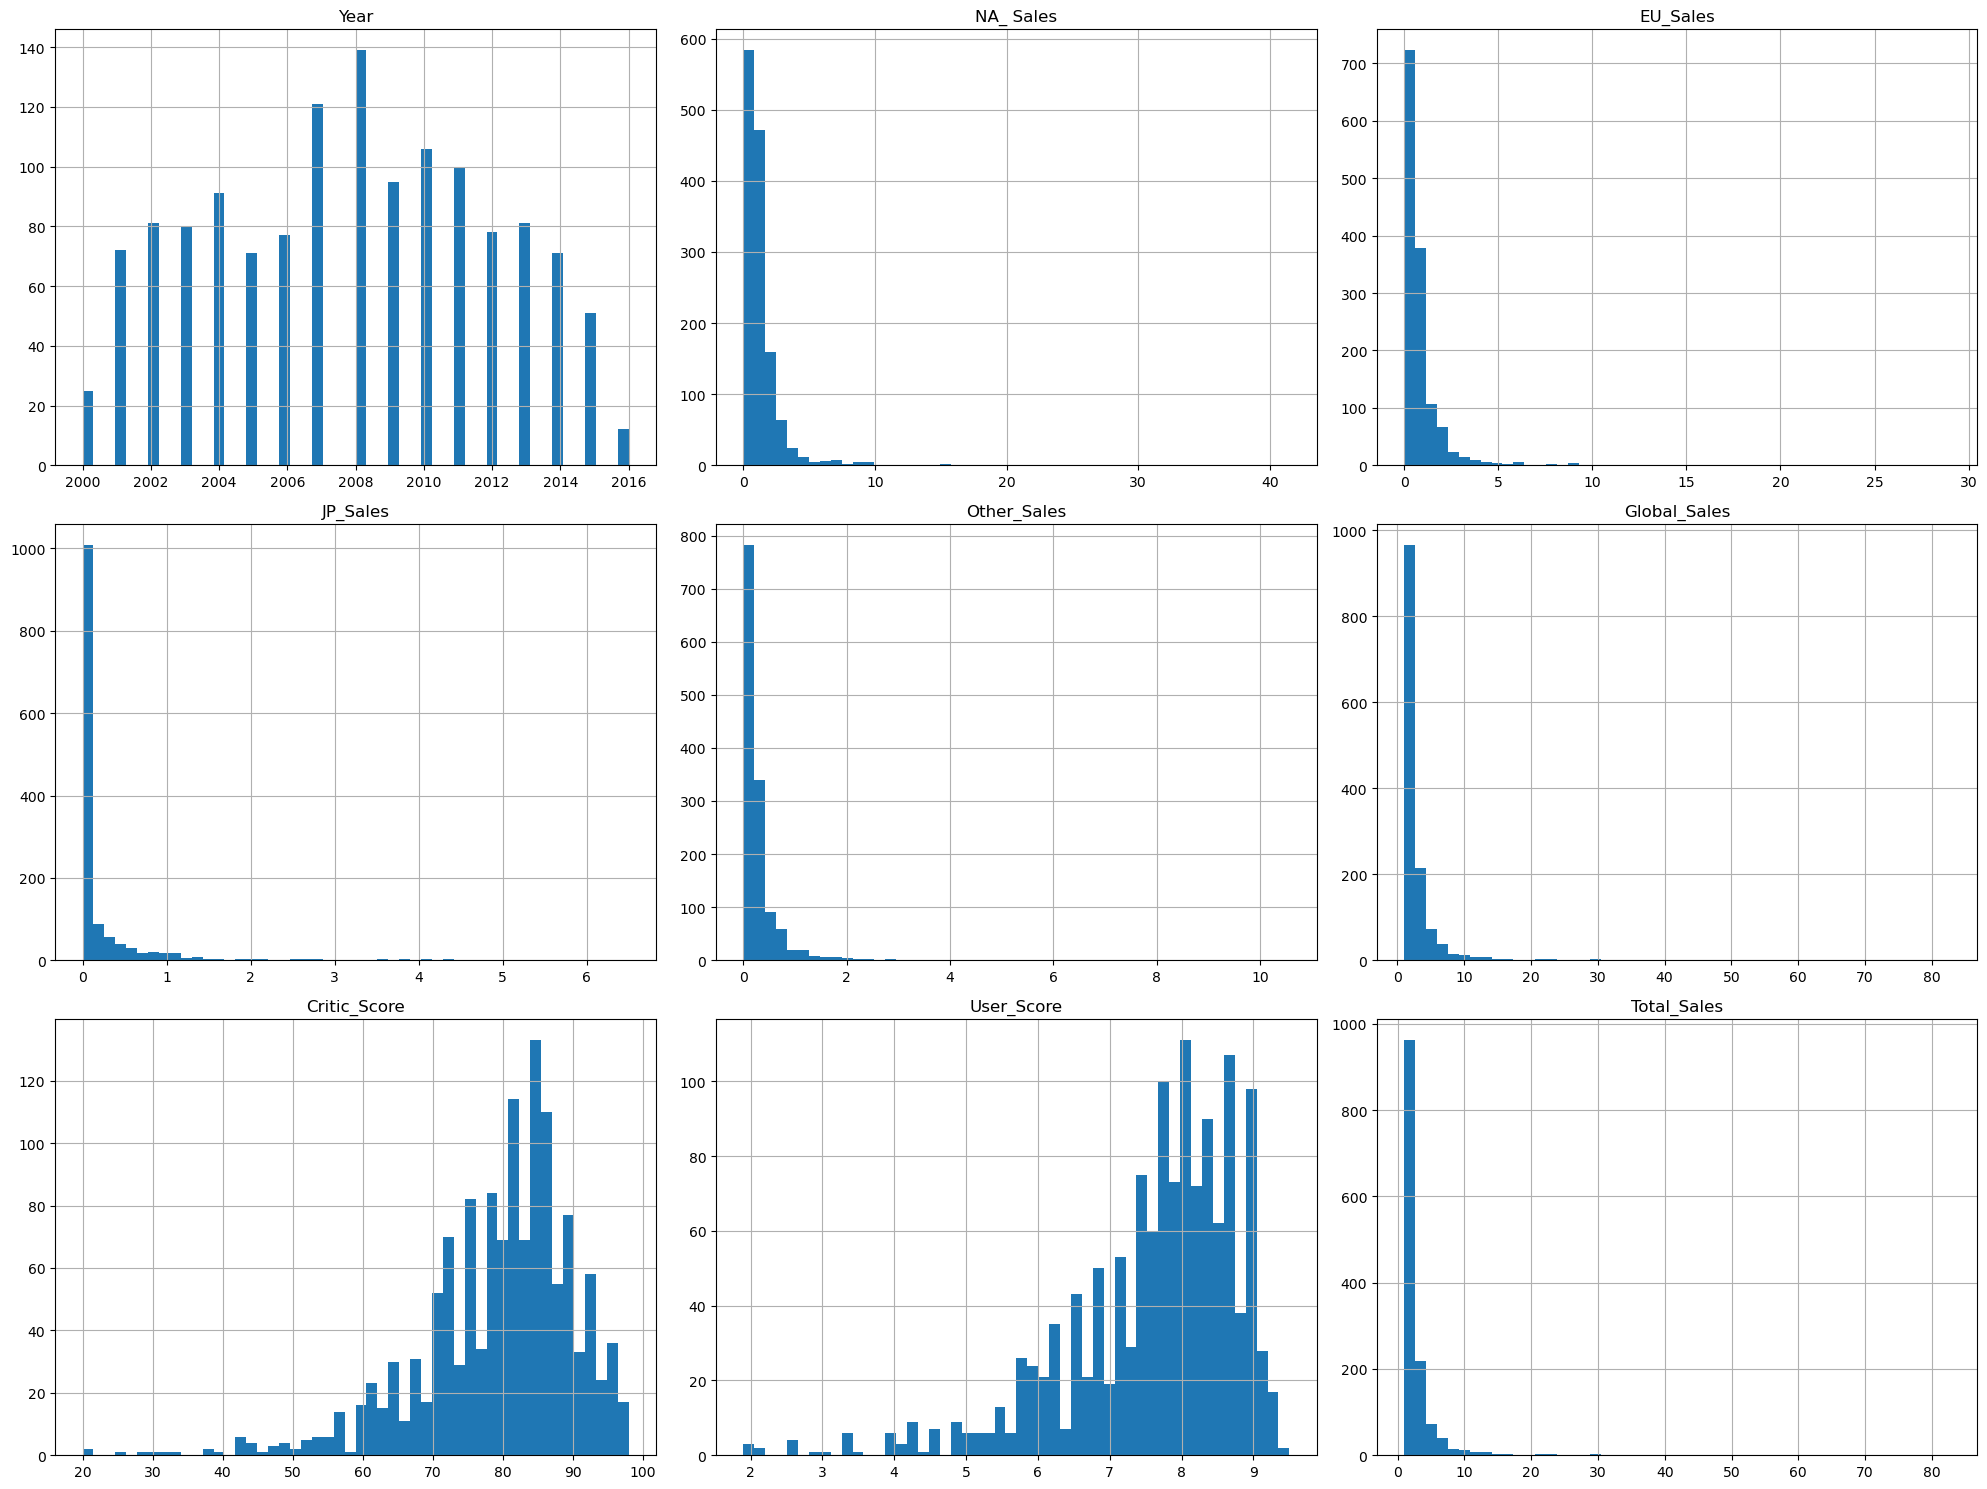

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

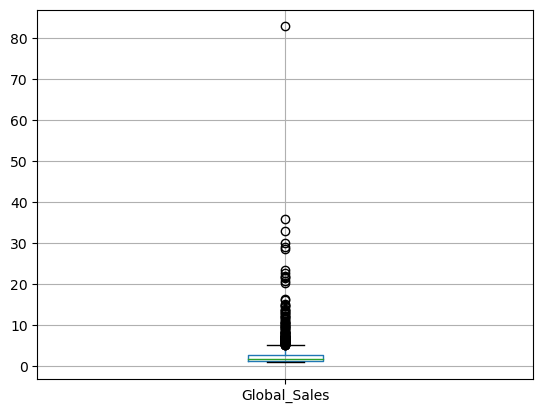

In [16]:
df.boxplot(column=['Global_Sales'])
plt.show()


/var/folders/tj/71y3kkvs217c8cfqvcdtk75m0000gn/T/ipykernel_77653/1963568534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


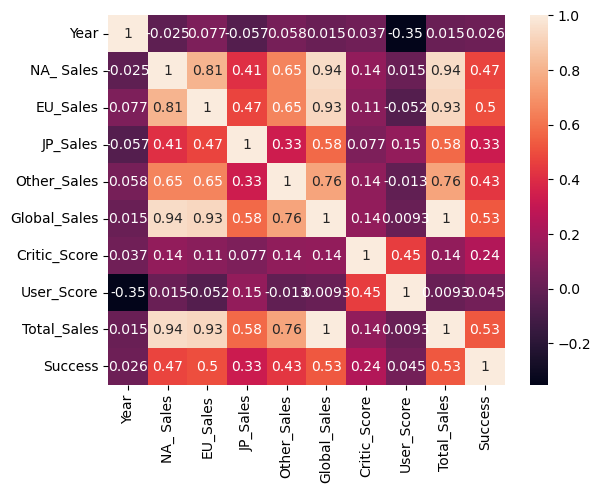

In [17]:

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

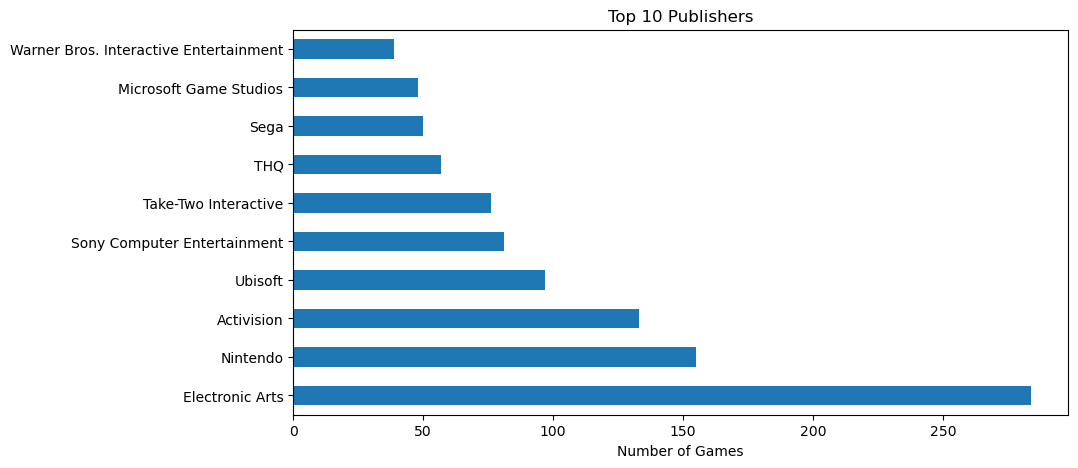

In [18]:
df['Publisher'].value_counts().head(10).plot(kind='barh', figsize=(10,5))
plt.title('Top 10 Publishers')
plt.xlabel('Number of Games')
plt.show()


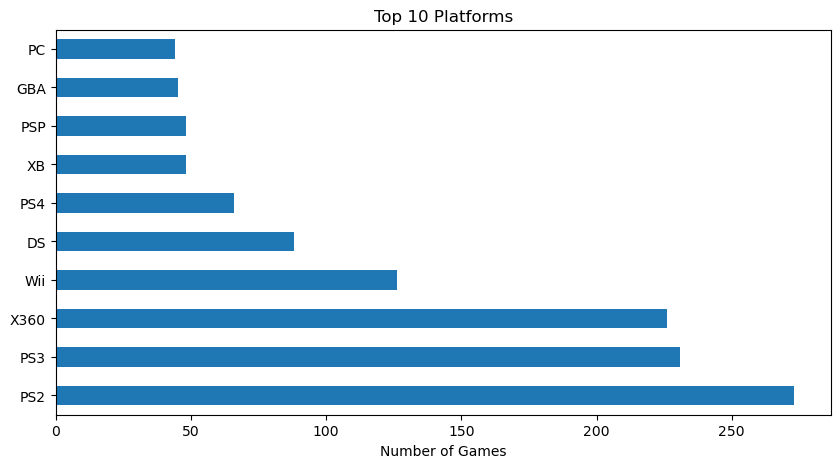

In [19]:
df['Platform'].value_counts().head(10).plot(kind='barh', figsize=(10,5))
plt.title('Top 10 Platforms')
plt.xlabel('Number of Games')
plt.show()

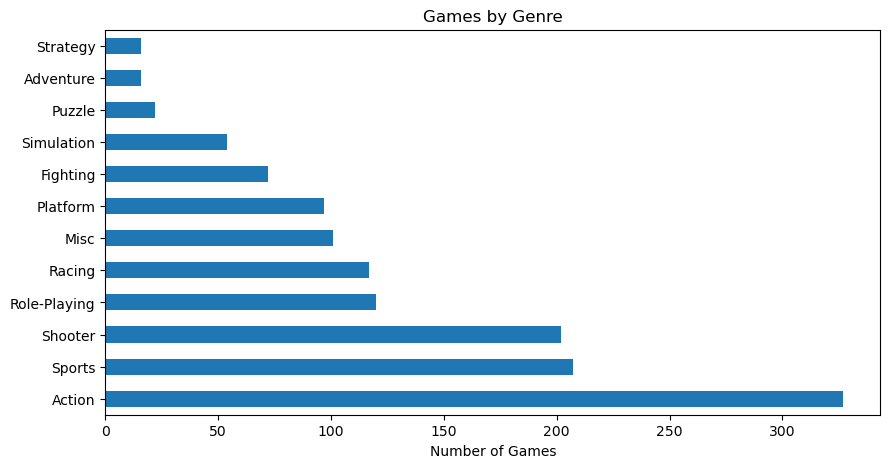

In [20]:
df['Genre'].value_counts().plot(kind='barh', figsize=(10,5))
plt.title('Games by Genre')
plt.xlabel('Number of Games')
plt.show()

In [21]:
df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

Genre
Misc            3.328713
Shooter         3.057673
Platform        2.980928
Sports          2.904589
Racing          2.805812
Puzzle          2.795909
Role-Playing    2.636583
Action          2.551743
Simulation      2.495926
Adventure       2.243750
Fighting        2.002083
Strategy        1.643750
Name: Global_Sales, dtype: float64

In [22]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)


Publisher
Nintendo                                  799.00
Electronic Arts                           624.00
Activision                                417.92
Take-Two Interactive                      280.34
Sony Computer Entertainment               250.17
Ubisoft                                   239.67
Microsoft Game Studios                    184.99
THQ                                        92.24
Konami Digital Entertainment               80.28
Square Enix                                79.69
Sega                                       79.69
Warner Bros. Interactive Entertainment     77.98
Capcom                                     71.97
Bethesda Softworks                         62.59
LucasArts                                  60.85
Namco Bandai Games                         58.53
Atari                                      45.91
505 Games                                  22.82
Midway Games                               20.28
Disney Interactive Studios                 19.47
Eidos Inte

In [23]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)


Platform
PS2     683.03
X360    655.94
PS3     605.86
Wii     566.93
DS      298.05
PS4     187.37
PC       99.24
PSP      93.35
GBA      89.28
3DS      86.22
XOne     85.80
GC       83.73
XB       83.64
WiiU     45.38
PS       40.44
PSV       9.91
GB        5.25
N64       3.66
DC        2.90
Name: Global_Sales, dtype: float64

From here, I can see which unique values to choose based off of overall sales.

**Feature Engineering**

In [24]:
df_encoded = pd.get_dummies(df, columns=['Publisher', 'Platform', 'Genre'])

In [25]:
df_encoded.columns

Index(['Name', 'Year', 'NA_ Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'User_Score', 'Rating', 'Total_Sales',
       'Success', 'Publisher_505 Games', 'Publisher_Acclaim Entertainment',
       'Publisher_Activision', 'Publisher_Atari', 'Publisher_Atlus',
       'Publisher_Bethesda Softworks', 'Publisher_Black Label Games',
       'Publisher_Capcom', 'Publisher_City Interactive',
       'Publisher_Codemasters', 'Publisher_Crave Entertainment',
       'Publisher_D3Publisher', 'Publisher_Deep Silver',
       'Publisher_Disney Interactive Studios', 'Publisher_Eidos Interactive',
       'Publisher_Electronic Arts', 'Publisher_Empire Interactive',
       'Publisher_Global Star', 'Publisher_Gotham Games',
       'Publisher_Hello Games', 'Publisher_Infogrames',
       'Publisher_Konami Digital Entertainment', 'Publisher_LucasArts',
       'Publisher_MTV Games', 'Publisher_Mastertronic',
       'Publisher_Microsoft Game Studios', 'Publisher_Midway Game

In [26]:
columns_to_keep = ['Publisher_Nintendo', 'Publisher_Electronic Arts', 'Publisher_Activision', 'Publisher_Take-Two Interactive',
                   'Publisher_Sony Computer Entertainment', 'Platform_PS2', 'Platform_X360','Platform_DS', 'Platform_PS3',
                   'Platform_Wii', 'Genre_Misc', 'Genre_Shooter', 'Genre_Platform', 'Genre_Sports', 'Genre_Racing']

In [27]:
X = df_encoded[columns_to_keep]
y = df_encoded['Success']

In [28]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_ Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'User_Score', 'Rating', 'Total_Sales', 'Success'],
      dtype='object')

**Applying the Machine Learning Models:**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)

In [30]:
print('ROC AUC: ', roc_auc)
print(classification_report(y_test, y_pred))

ROC AUC:  0.5724316334072432
              precision    recall  f1-score   support

       False       0.79      0.90      0.84       205
        True       0.44      0.24      0.31        66

    accuracy                           0.74       271
   macro avg       0.62      0.57      0.58       271
weighted avg       0.70      0.74      0.71       271



In [31]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

scores = cross_val_score(clf, X, y, cv=cv, scoring='roc_auc')

print(f'ROC AUC for each fold: {scores}')
print(f'Average ROC AUC: {scores.mean()}')


ROC AUC for each fold: [0.60163721 0.61498981 0.57782469 0.54823175 0.60399971]
Average ROC AUC: 0.5893366324429621


In [32]:
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC(kernel='linear', probability=True, random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models:
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    print(f'{name}:')
    print(f'  ROC AUC for each fold: {scores}')
    print(f'  Average ROC AUC: {scores.mean()}')
    print('\n')

Random Forest:
  ROC AUC for each fold: [0.60163721 0.61498981 0.57782469 0.54823175 0.60399971]
  Average ROC AUC: 0.5893366324429621


Logistic Regression:
  ROC AUC for each fold: [0.58341785 0.61888468 0.63861386 0.58091317 0.6718256 ]
  Average ROC AUC: 0.6187310326157542


Gradient Boosting:
  ROC AUC for each fold: [0.60370183 0.63126092 0.61662784 0.55120947 0.64256305]
  Average ROC AUC: 0.6090726203497405


Support Vector Machine:
  ROC AUC for each fold: [0.45798319 0.47309988 0.54371724 0.4937137  0.52139549]
  Average ROC AUC: 0.49798189986287367


K-Nearest Neighbors:
  ROC AUC for each fold: [0.57472472 0.4949039  0.58397641 0.49514742 0.50294096]
  Average ROC AUC: 0.5303386815659902


Decision Tree:
  ROC AUC for each fold: [0.591133   0.60865609 0.59085614 0.55422395 0.5892949 ]
  Average ROC AUC: 0.586832818893674


Naive Bayes:
  ROC AUC for each fold: [0.57501449 0.58110076 0.61764706 0.59061834 0.6203588 ]
  Average ROC AUC: 0.5969478877092742




Based off the values above, Gradient Boosting is the choice of model that I will be using to predict and recommend

In [33]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

model = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc')

grid.fit(X, y)

print(f'Best parameters: {grid.best_params_}')
print(f'Best ROC AUC: {grid.best_score_}')


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best ROC AUC: 0.6244711522547697


In [34]:
best_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=300, random_state=42)

best_model.fit(X, y)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300,
                           random_state=42)

Applying the test data to help make a prediction and help make a recommendation to HVC.

In [35]:
y_pred = best_model.predict(X_test)
print(y_pred[:10])

[False  True False False False False False False False False]


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7749077490774908
Classification Report:
              precision    recall  f1-score   support

       False       0.77      1.00      0.87       205
        True       0.86      0.09      0.16        66

    accuracy                           0.77       271
   macro avg       0.81      0.54      0.52       271
weighted avg       0.79      0.77      0.70       271

Confusion Matrix:
[[204   1]
 [ 60   6]]


Based off all of the data, I would choose the model Gradient Boosting Model, and creating an action or sports game which would maximize sales if published by Sony Computer Entertainment and is on the new PlayStation console.